In [247]:
from DatasetGenerator import *
from helpers import *
from markov_algos import *
from plots import *

import pandas as pd
from time import time

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Evolution of the Markov chain during the simulated annealing process (Q2.a)

### for G1

In [236]:
# datas = [G1() for i in range(10)]
data = G1()
# arbitrarily chosen parameters
lambda_ = 0.5
starting_state = np.zeros(data.N)

[step 1/7] Time spent on beta = 1.000 : 21.401 sec
[step 2/7] Time spent on beta = 4.642 : 24.890 sec
[step 3/7] Time spent on beta = 21.544 : 26.720 sec
[step 4/7] Time spent on beta = 100.000 : 27.424 sec
[step 5/7] Time spent on beta = 464.159 : 27.617 sec
[step 6/7] Time spent on beta = 2154.435 : 28.690 sec
[step 7/7] Time spent on beta = 10000.000 : 28.667 sec


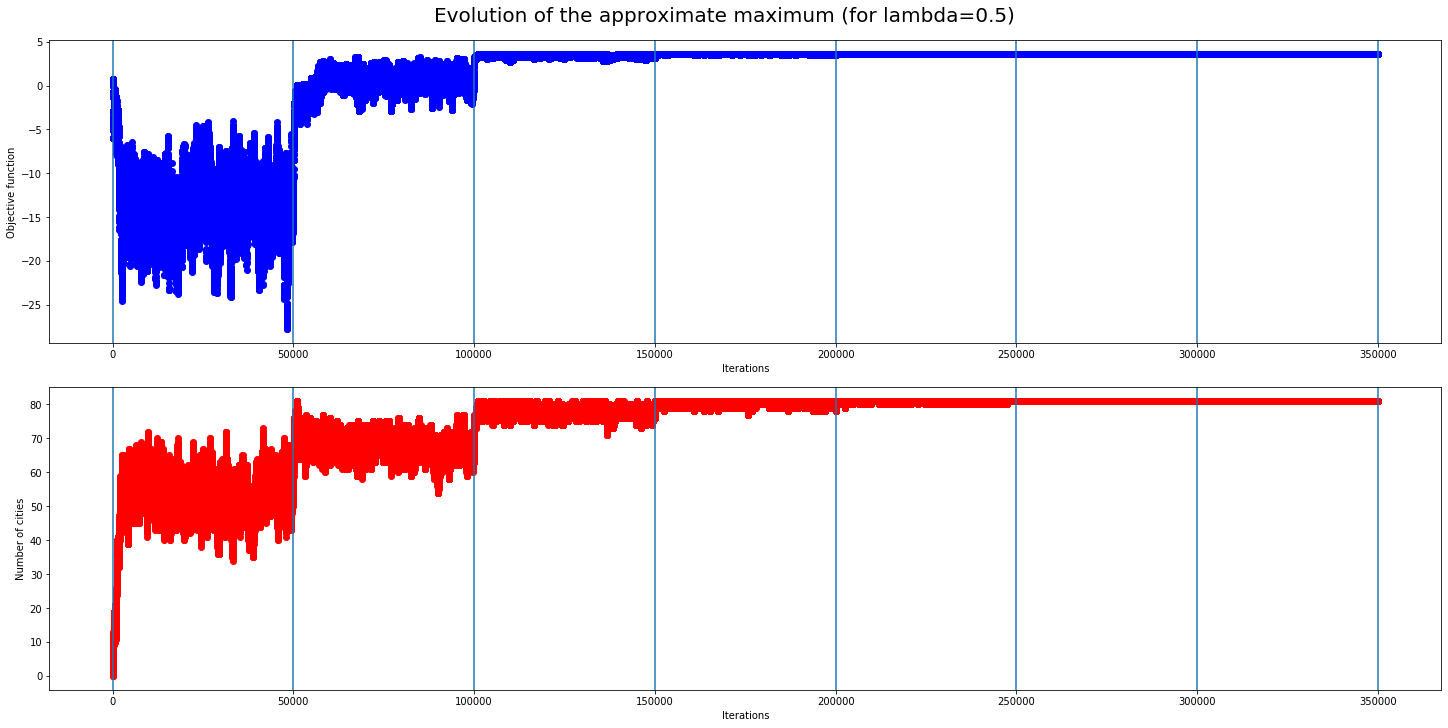

In [237]:
n_iter = 50000
betas = np.logspace(0, 4, 7)
S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/7] Time spent on beta = 1.000 : 24.204 sec
[step 2/7] Time spent on beta = 1667.500 : 29.654 sec
[step 3/7] Time spent on beta = 3334.000 : 29.860 sec
[step 4/7] Time spent on beta = 5000.500 : 28.039 sec
[step 5/7] Time spent on beta = 6667.000 : 28.626 sec
[step 6/7] Time spent on beta = 8333.500 : 28.033 sec
[step 7/7] Time spent on beta = 10000.000 : 27.892 sec


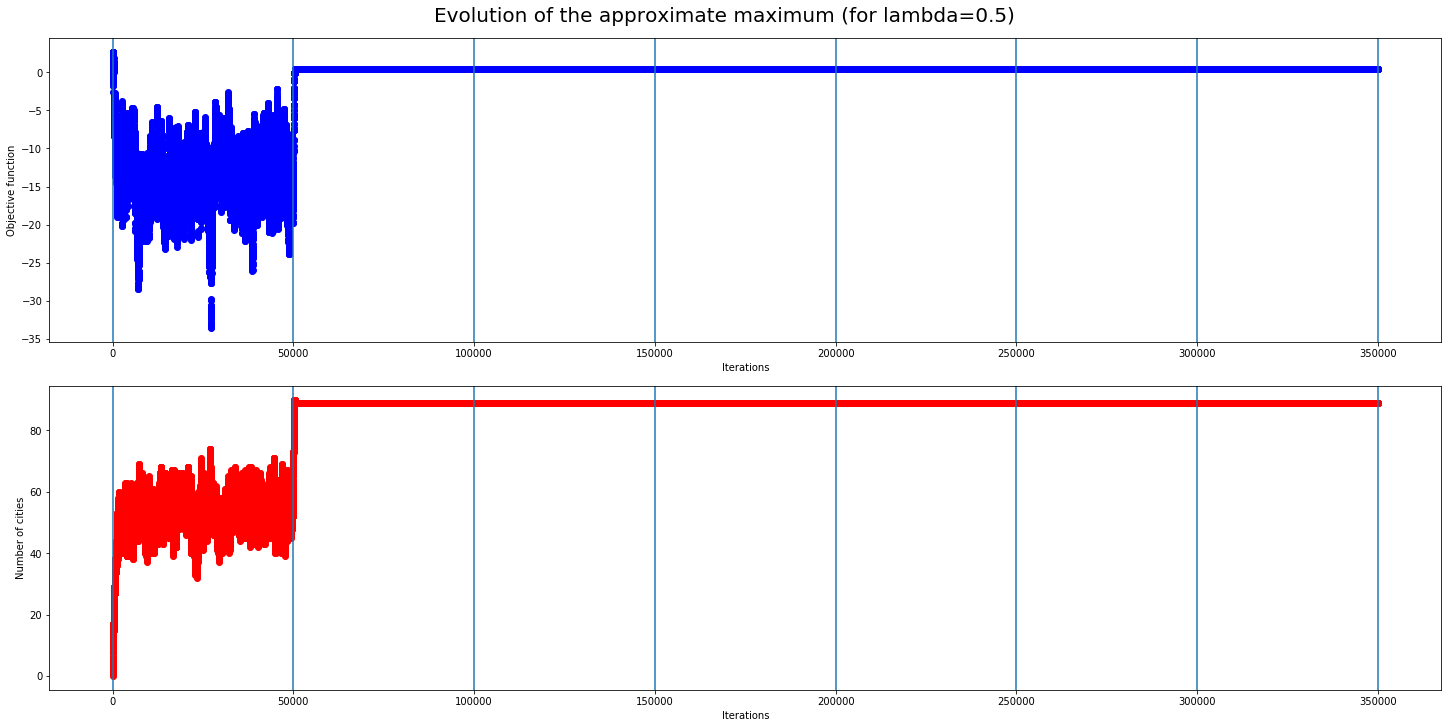

In [240]:
n_iter = 50000
betas = np.linspace(1, 10**4, 7)
S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/7] Time spent on beta = 1.000 : 39.464 sec
[step 2/7] Time spent on beta = 4.642 : 46.462 sec
[step 3/7] Time spent on beta = 21.544 : 50.129 sec
[step 4/7] Time spent on beta = 100.000 : 57.975 sec
[step 5/7] Time spent on beta = 464.159 : 58.827 sec
[step 6/7] Time spent on beta = 2154.435 : 56.407 sec
[step 7/7] Time spent on beta = 10000.000 : 58.916 sec


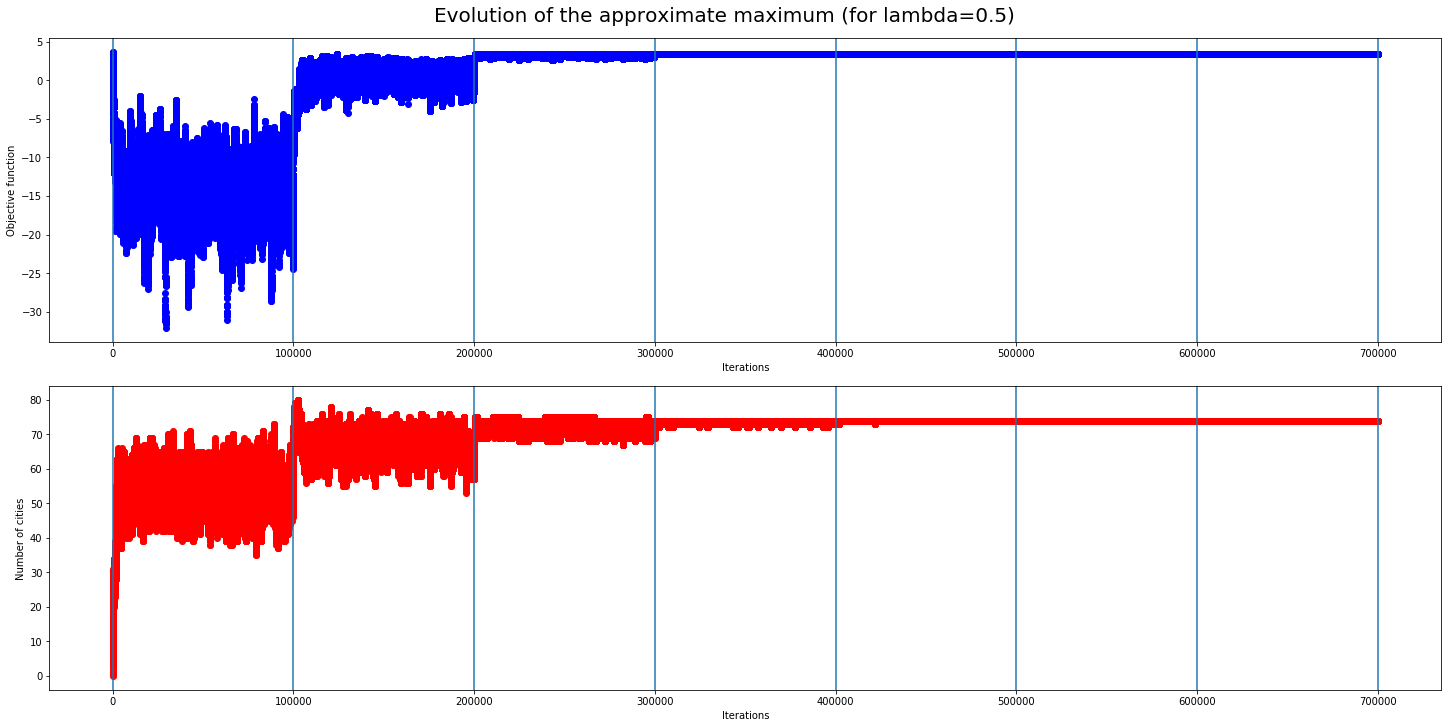

In [241]:
n_iter = 100000
betas = np.logspace(0, 4, 7)
S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/7] Time spent on beta = 1.000 : 0.054 sec
[step 2/7] Time spent on beta = 4.642 : 0.048 sec
[step 3/7] Time spent on beta = 21.544 : 0.034 sec
[step 4/7] Time spent on beta = 100.000 : 0.046 sec
[step 5/7] Time spent on beta = 464.159 : 0.040 sec
[step 6/7] Time spent on beta = 2154.435 : 0.037 sec
[step 7/7] Time spent on beta = 10000.000 : 0.050 sec


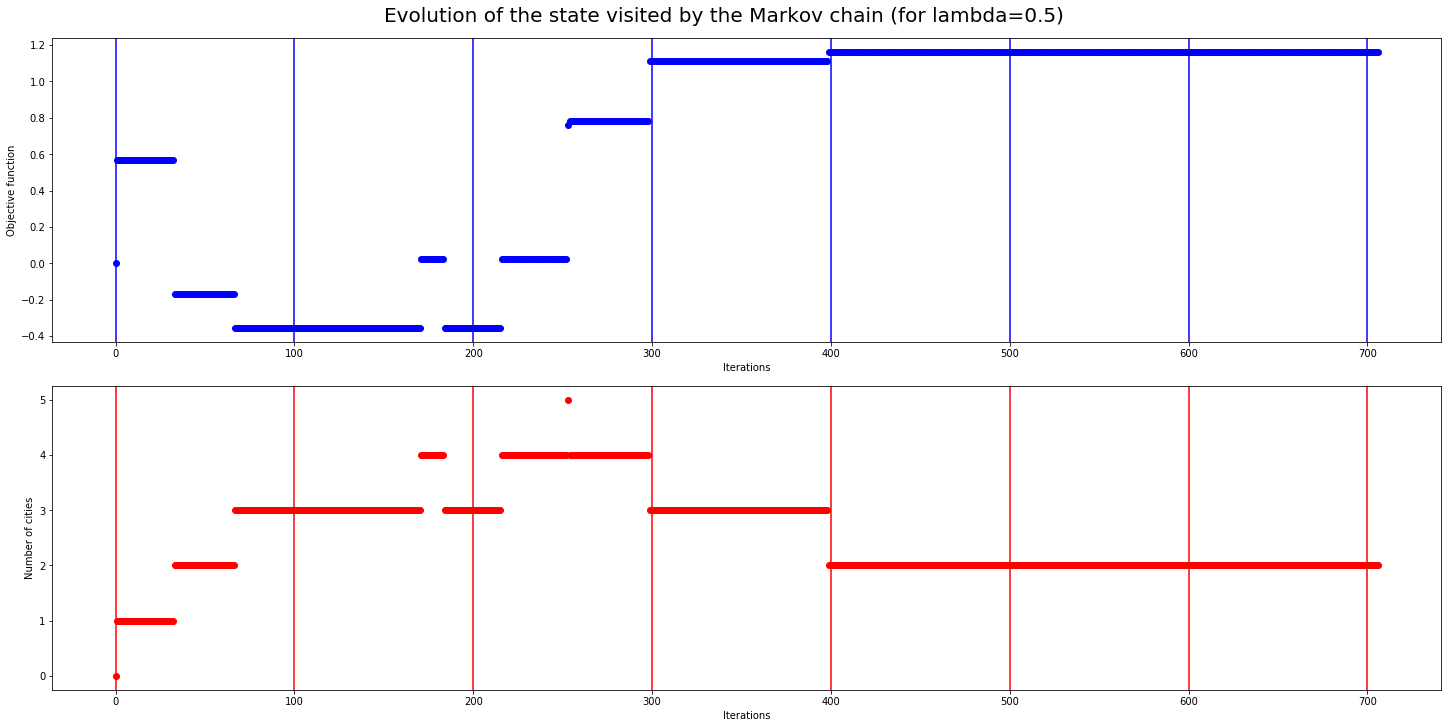

In [248]:
n_iter = 100
betas = np.logspace(0, 4, 7)
S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/5] Time spent on beta = 1.000 : 37.670 sec
[step 2/5] Time spent on beta = 10.000 : 58.529 sec
[step 3/5] Time spent on beta = 100.000 : 58.703 sec
[step 4/5] Time spent on beta = 1000.000 : 64.054 sec
[step 5/5] Time spent on beta = 10000.000 : 67.253 sec


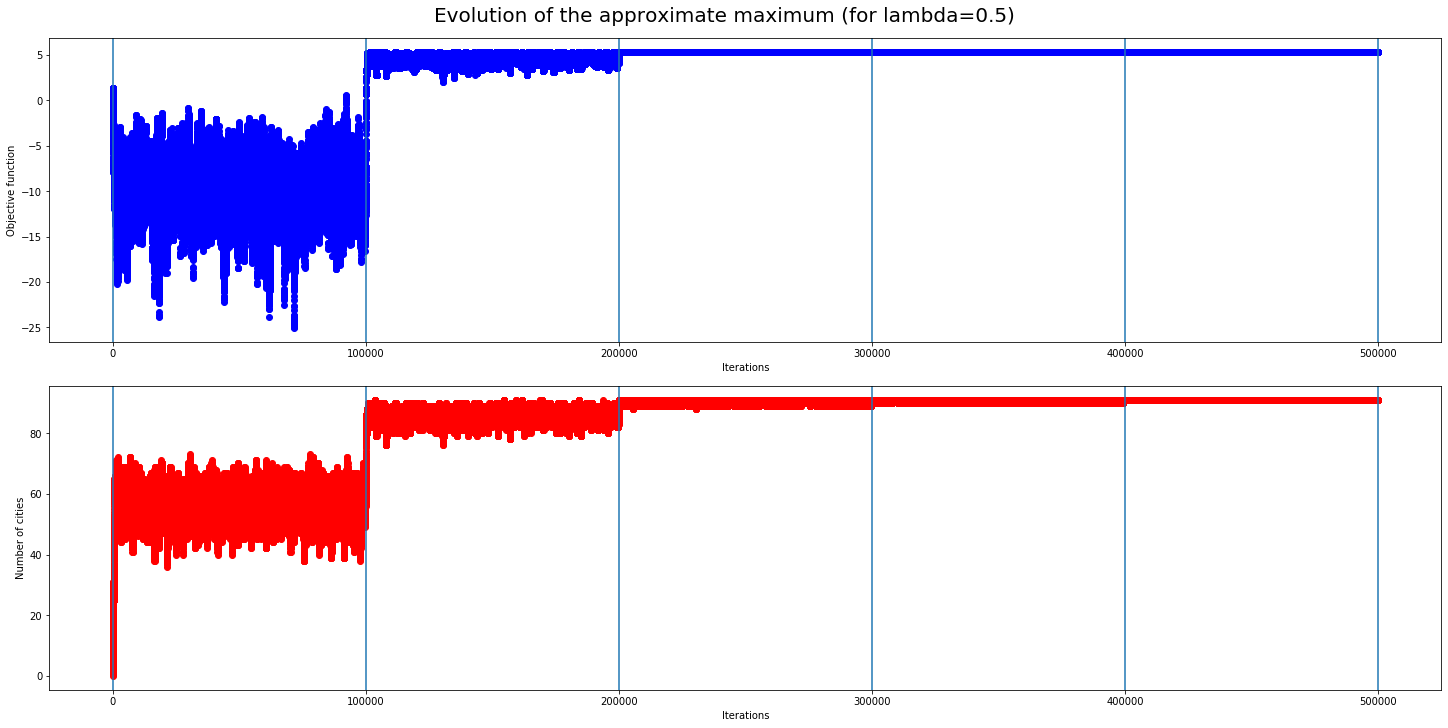

In [233]:
# datas = [G1() for i in range(10)]
data = G1()
# arbitrarily chosen parameters
lambda_ = 0.5
n_iter = 100000
starting_state = np.zeros(data.N)
betas = np.logspace(0, 4, 5)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

In [234]:
# datas = [G1() for i in range(10)]
data = G1()
# arbitrarily chosen parameters
lambda_ = 0.5
n_iter = 100000
starting_state = np.zeros(data.N)
betas = np.linspace(0, 10**4, 7)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/7] Time spent on beta = 0.000 : 54.344 sec


KeyboardInterrupt: 

[step 1/7] Time spent on beta = 1.000 : 3.952 sec
[step 2/7] Time spent on beta = 4.642 : 4.267 sec
[step 3/7] Time spent on beta = 21.544 : 4.770 sec
[step 4/7] Time spent on beta = 100.000 : 5.152 sec
[step 5/7] Time spent on beta = 464.159 : 5.031 sec
[step 6/7] Time spent on beta = 2154.435 : 5.448 sec
[step 7/7] Time spent on beta = 10000.000 : 5.933 sec


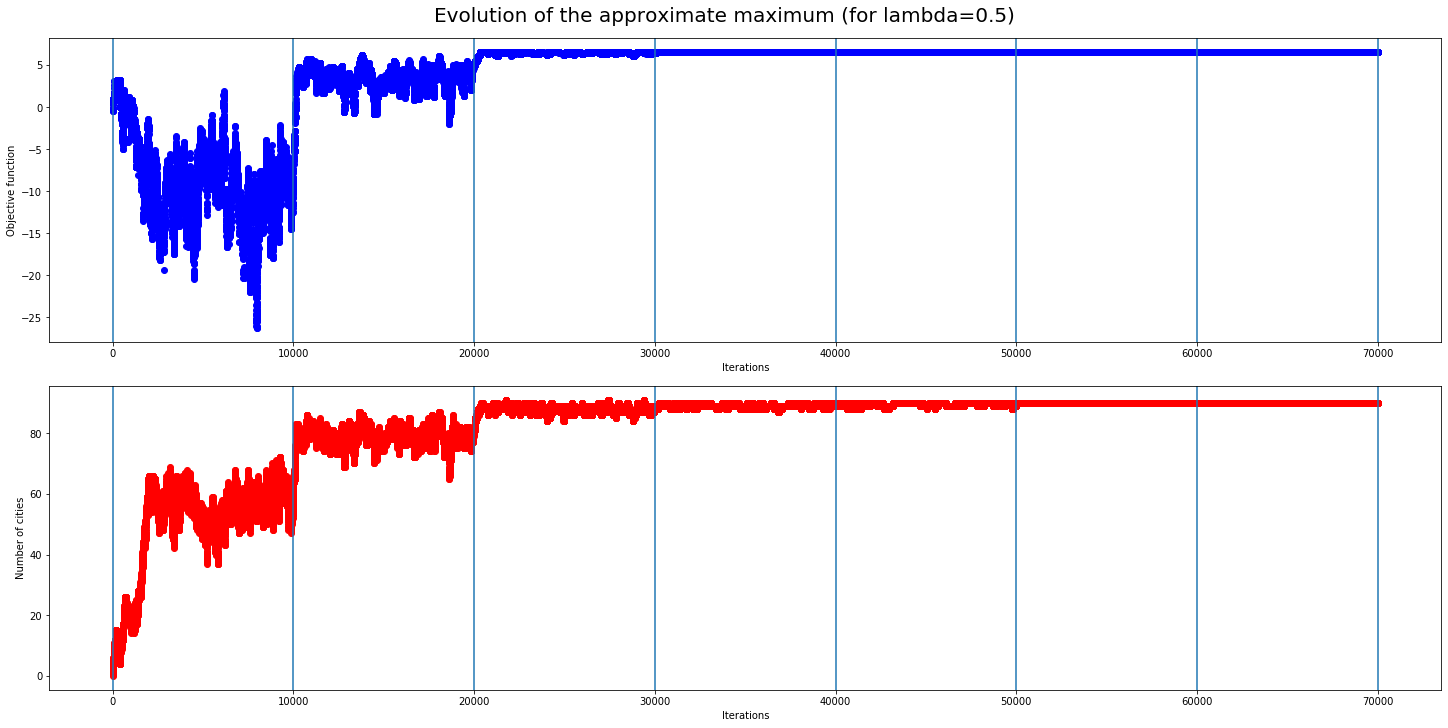

In [232]:
S_approx = simulated_annealing(starting_state, betas, 10000, lambda_, data, verbose=True, plot=True)

### for G2

[step 1/15] Time spent on beta = 0.000 : 7.106 sec
[step 2/15] Time spent on beta = 0.286 : 9.742 sec
[step 3/15] Time spent on beta = 0.571 : 11.289 sec
[step 4/15] Time spent on beta = 0.857 : 9.769 sec
[step 5/15] Time spent on beta = 1.143 : 5.119 sec
[step 6/15] Time spent on beta = 1.429 : 4.955 sec
[step 7/15] Time spent on beta = 1.714 : 4.805 sec
[step 8/15] Time spent on beta = 2.000 : 4.799 sec
[step 9/15] Time spent on beta = 2.286 : 4.805 sec
[step 10/15] Time spent on beta = 2.571 : 4.681 sec
[step 11/15] Time spent on beta = 2.857 : 5.025 sec
[step 12/15] Time spent on beta = 3.143 : 5.294 sec
[step 13/15] Time spent on beta = 3.429 : 4.980 sec
[step 14/15] Time spent on beta = 3.714 : 4.941 sec
[step 15/15] Time spent on beta = 4.000 : 4.968 sec


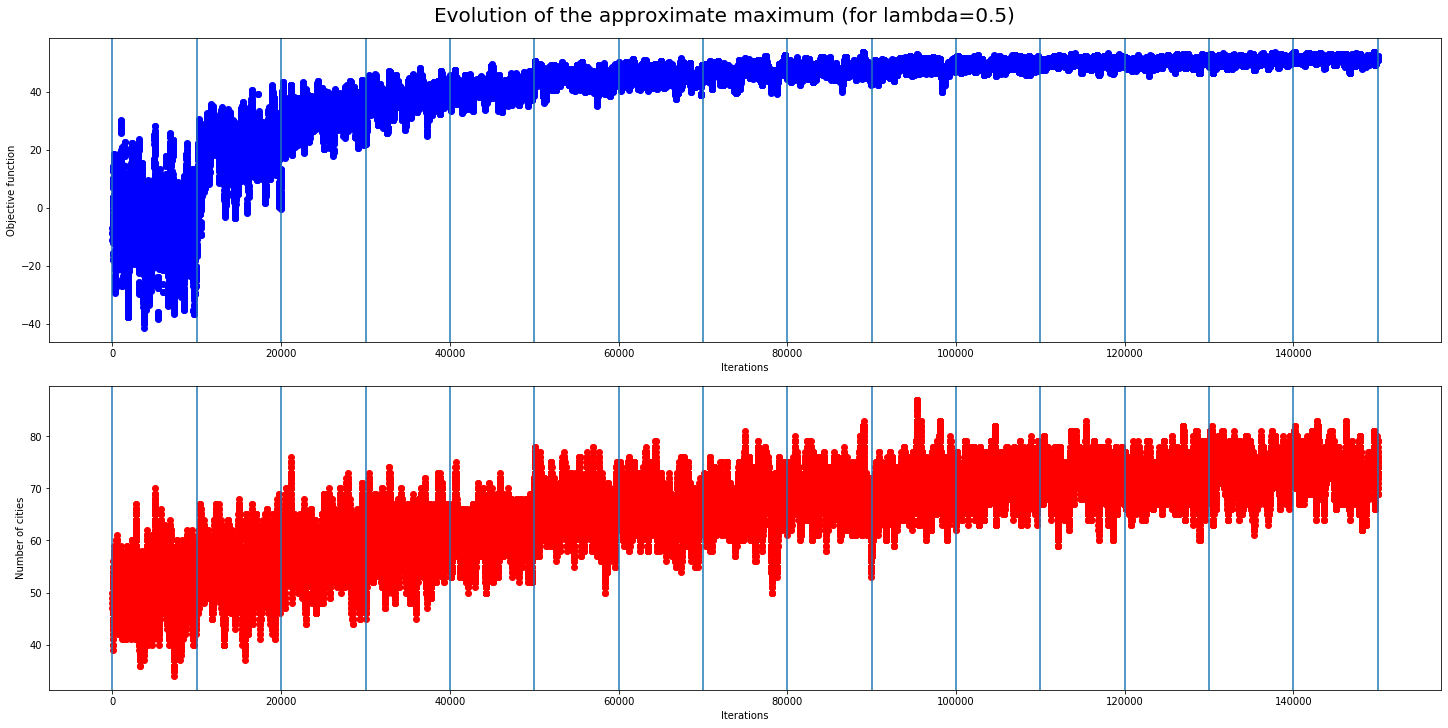

In [224]:
data = G2()

# arbitrarily chosen parameters
lambda_ = 0.5
n_iter = 10000
starting_state = np.zeros(data.N)
betas = np.linspace(0, 4, 10)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

## Evolution of the average approximation computed with respect to lambda  (Q2.b)

### for G1

In [ ]:
G = G1 
lambdas = np.linspace(0, 1, 10)
betas = np.linspace(0, 4, 10)
n_iter = 10000
nb_instances = 5
plot_avg_lambda(G, lambdas, betas, n_iter, nb_instances, verbose=False)

### for G2

In [ ]:
G = G2
lambdas = np.linspace(0, 1, 10)
betas = np.linspace(0, 4, 10)
n_iter = 10000
nb_instances = 5
plot_avg_lambda(G, lambdas, betas, n_iter, nb_instances, verbose=False)

## Convergence of the average approximation computed for different number of iterations at beta fixed

In [140]:
def evol_n_iter():
    G = G1 
    lambda_ = 0.5
    betas = np.linspace(0, 3, 10)
    n_iter_range = range(200, 20000, 2000)
#     n_iter_range = [200, 300]
    obj_range = []
    size_range = []
    for i, n_iter in enumerate(n_iter_range):
        avg_obj, avg_size = avg(G, betas, lambda_, n_iter, 2, verbose=False)
        obj_range.append(avg_obj)
        size_range.append(avg_size)
        
        print("[n_iter {}/{}]".format(i + 1, len(n_iter_range)))

    fig, ax = plt.stotal_nb_iterubplots()
    ax.plot(n_iter_range, obj_range, color='blue', marker='o', ls=':')
    ax2 = ax.twinx()
    ax2.plot(n_iter_range, size_range, color='red', marker='o', ls=':')
    
    ax.set_title("Evolution of the approximate maximum with respect to"
                 + "\n the number of iteration per Metropolis-Hastings algorithm.", fontsize=16)
    ax.set_xlabel("Number of steps per Metropolis-Hastings algorithm", fontsize=14)
    ax.set_ylabel("Maximum objectif function", color='blue', fontsize=14)
    ax2.set_ylabel("Optimal number of cities", color='red', fontsize=14)
    fig.show()

In [141]:
#evol_n_iter()

## Test different ranges and number of betas

In [221]:
datas = [G1() for i in range(3)]

lambda_ = 0.5
total_n_iter = 100000
starting_state = np.zeros(data.N)

beta_range = [3, 4, 5]
beta_nb  = [5, 7, 10, 13]

df = pd.DataFrame(columns=['beta range', 'nb beta', 'maximum obj', 'size of S'])

for b_max in beta_range:
    for b_nb in beta_nb:
        betas = np.logspace(0, b_max, b_nb)
        n_iter = total_n_iter // b_nb
        
        avg_obj, avg_size = avg(datas, betas, lambda_, n_iter)
        res = {'beta range':b_max, 'nb beta':b_nb, 'maximum obj':avg_obj, 'size of S':avg_size}
        df = df.append(res, ignore_index=True)
df.to_csv('plots/betas_{}.csv'.format(data_char), index=False)
df

[5.372384243119711, 8.10088142678477, 1.0193288000141294]
[5.372384243119711, 7.535250230145095, 4.148799140312697]
[5.372384243119711, 8.10088142678477, 4.148799140312697]
[5.372384243119711, 8.10088142678477, 0.5025929979569241]


KeyboardInterrupt: 

### old stuff

[step 1/5] Time spent on beta = 1.000 : 16.033 sec
[step 2/5] Time spent on beta = 10.000 : 13.490 sec
[step 3/5] Time spent on beta = 100.000 : 11.918 sec
[step 4/5] Time spent on beta = 1000.000 : 11.052 sec
[step 5/5] Time spent on beta = 10000.000 : 10.878 sec


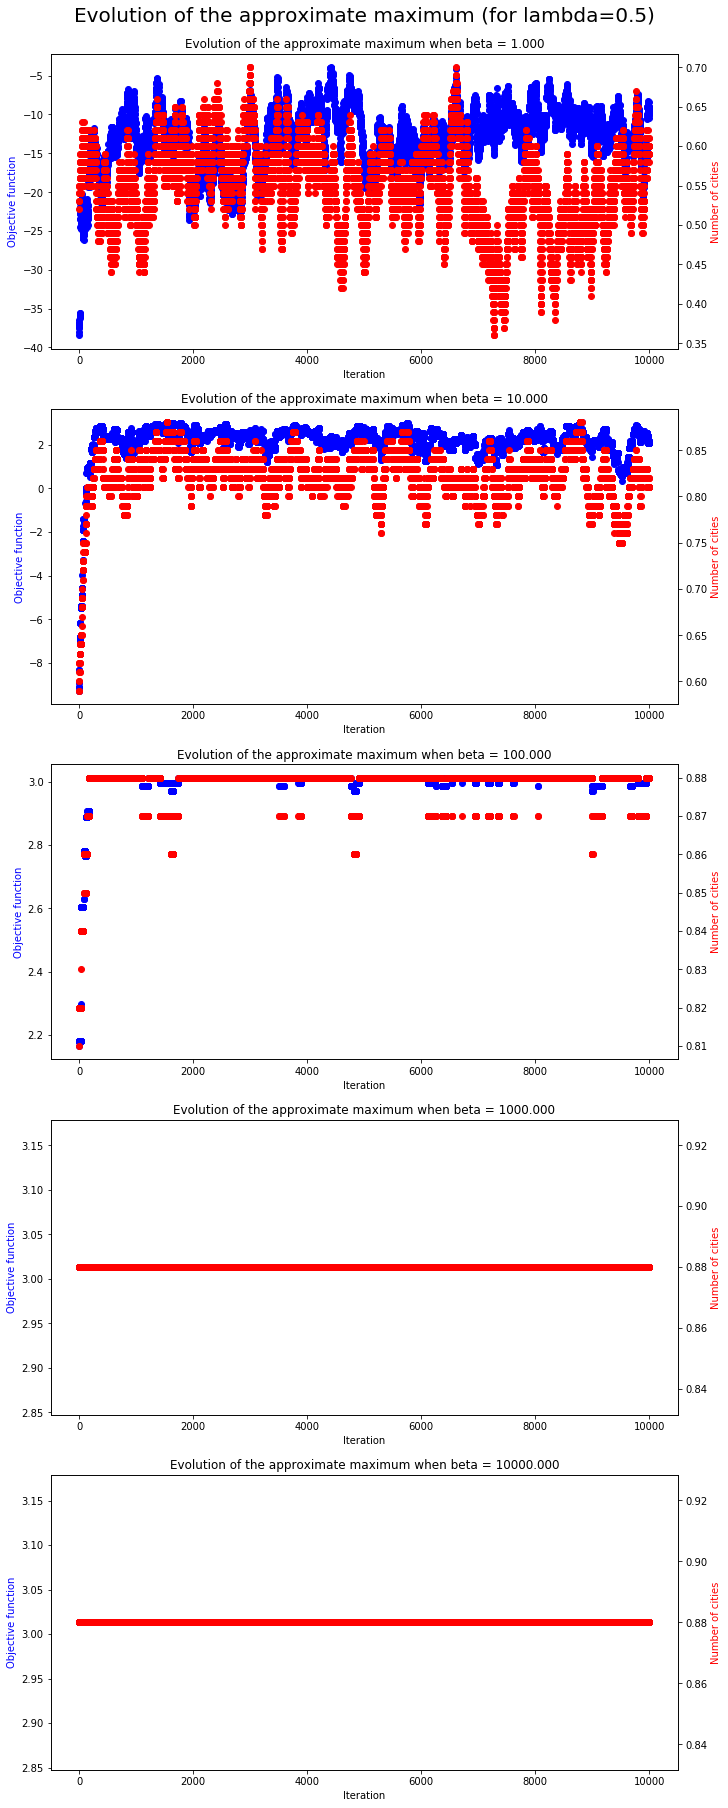

In [130]:
betas = np.logspace(0, 4, 5)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/3] Time spent on beta = 1.000 : 13.239 sec
[step 2/3] Time spent on beta = 100.000 : 15.014 sec
[step 3/3] Time spent on beta = 10000.000 : 15.543 sec


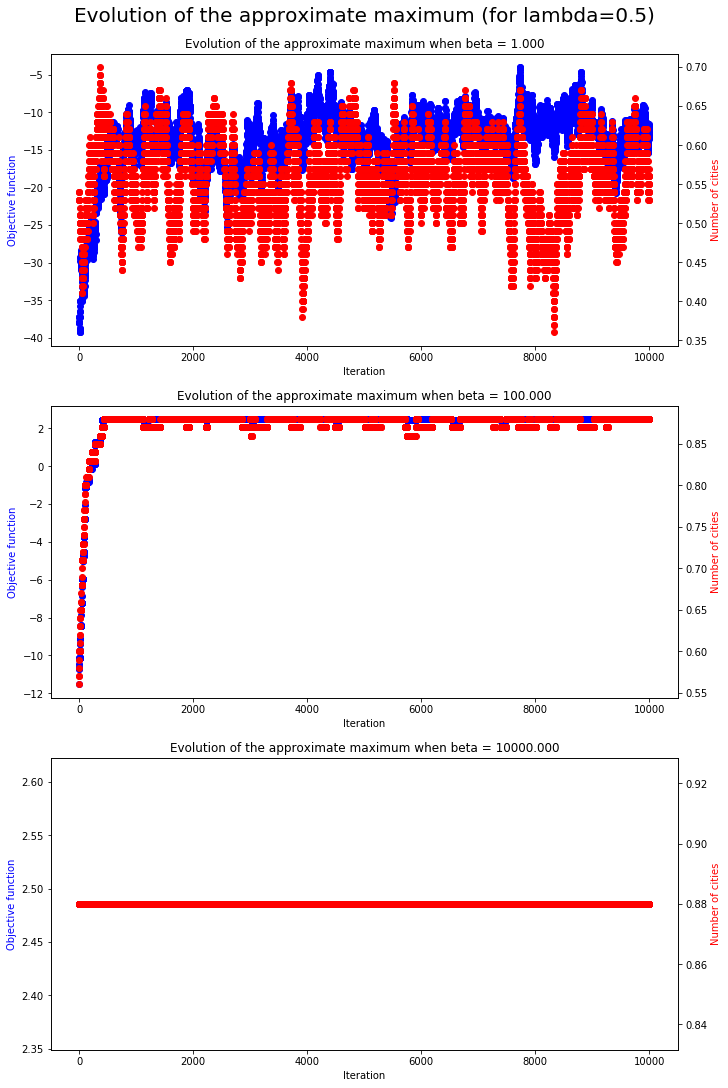

In [131]:
betas = np.logspace(0, 4, 3)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/3] Time spent on beta = 1.000 : 13.239 sec
[step 2/3] Time spent on beta = 100.000 : 15.014 sec
[step 3/3] Time spent on beta = 10000.000 : 15.543 sec


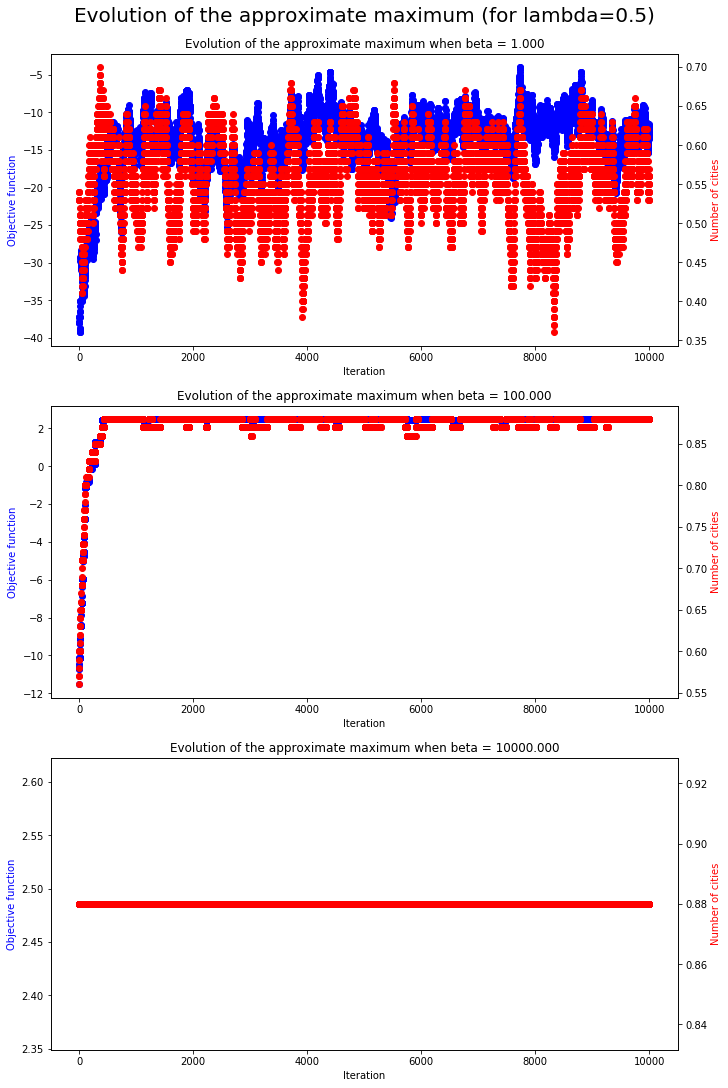

In [131]:
betas = np.logspace(0, 4, 3)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/7] Time spent on beta = 1.000 : 10.468 sec
[step 2/7] Time spent on beta = 4.642 : 10.848 sec
[step 3/7] Time spent on beta = 21.544 : 11.568 sec
[step 4/7] Time spent on beta = 100.000 : 11.024 sec
[step 5/7] Time spent on beta = 464.159 : 10.577 sec
[step 6/7] Time spent on beta = 2154.435 : 10.615 sec
[step 7/7] Time spent on beta = 10000.000 : 11.190 sec


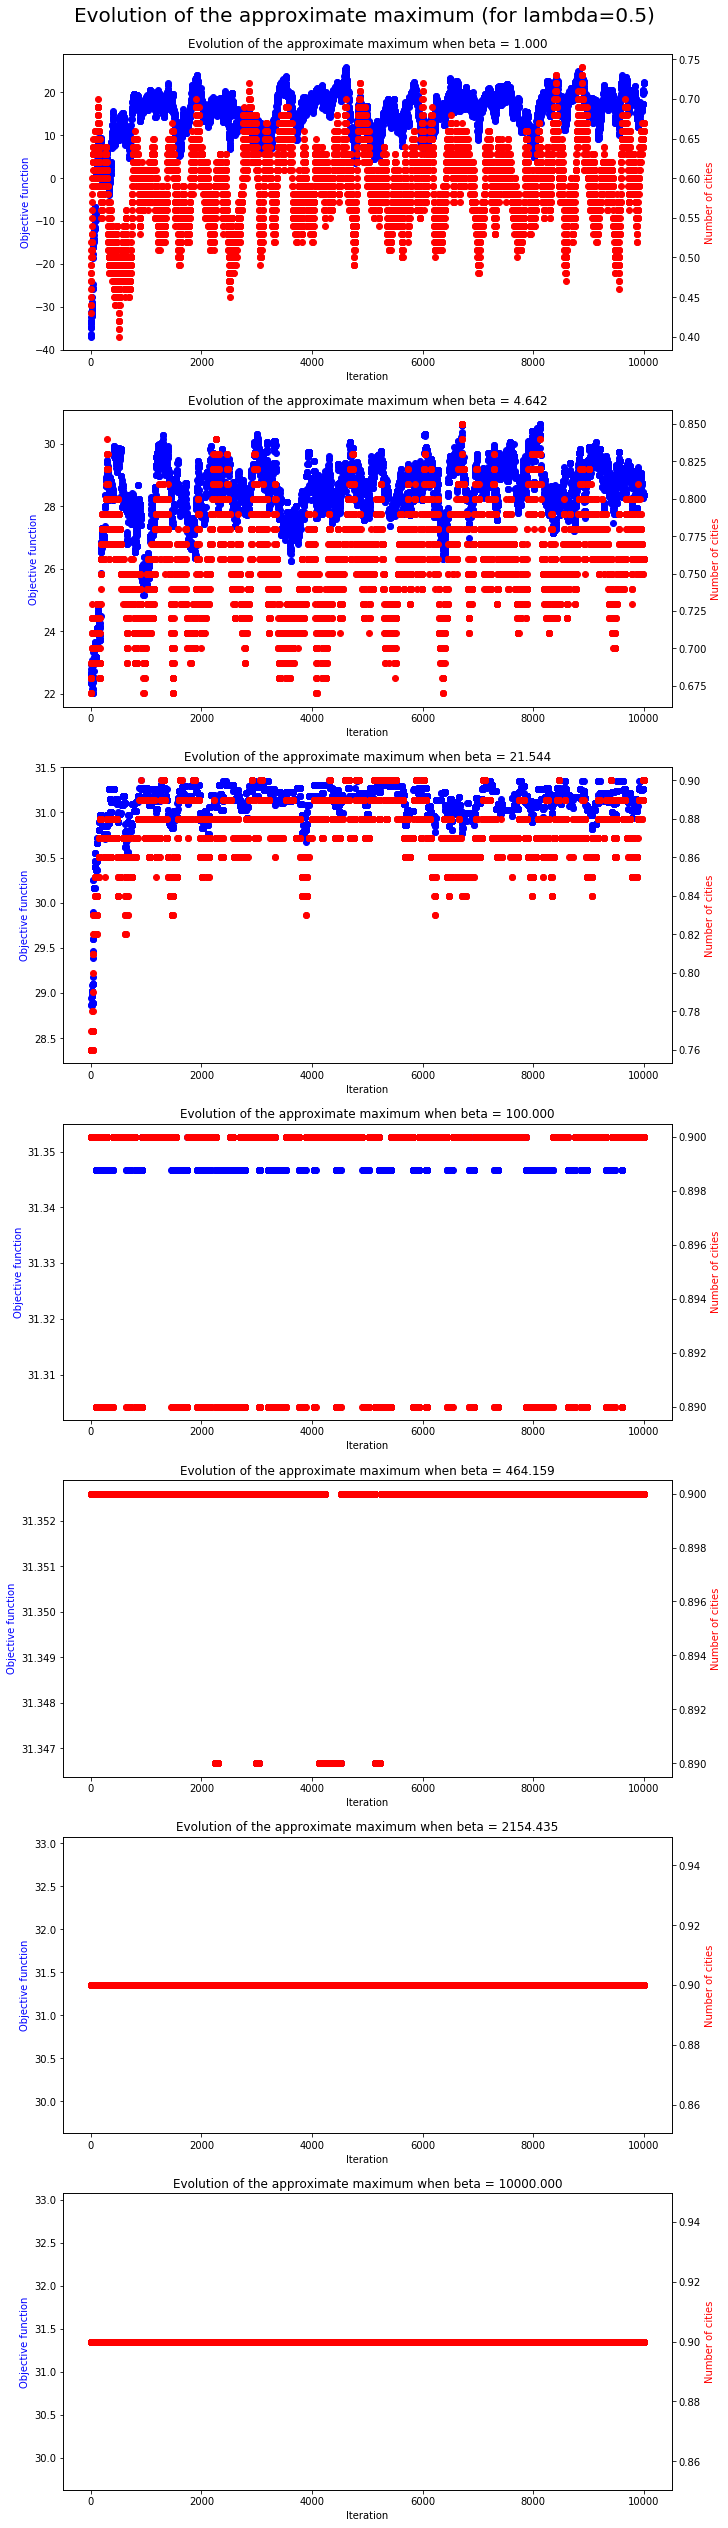

In [133]:
betas = np.logspace(0, 4, 7)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/10] Time spent on beta = 1.000 : 14.545 sec
[step 2/10] Time spent on beta = 2.154 : 18.132 sec
[step 3/10] Time spent on beta = 4.642 : 13.170 sec
[step 4/10] Time spent on beta = 10.000 : 12.954 sec
[step 5/10] Time spent on beta = 21.544 : 10.714 sec
[step 6/10] Time spent on beta = 46.416 : 12.698 sec
[step 7/10] Time spent on beta = 100.000 : 11.594 sec
[step 8/10] Time spent on beta = 215.443 : 10.677 sec
[step 9/10] Time spent on beta = 464.159 : 11.203 sec
[step 10/10] Time spent on beta = 1000.000 : 12.471 sec


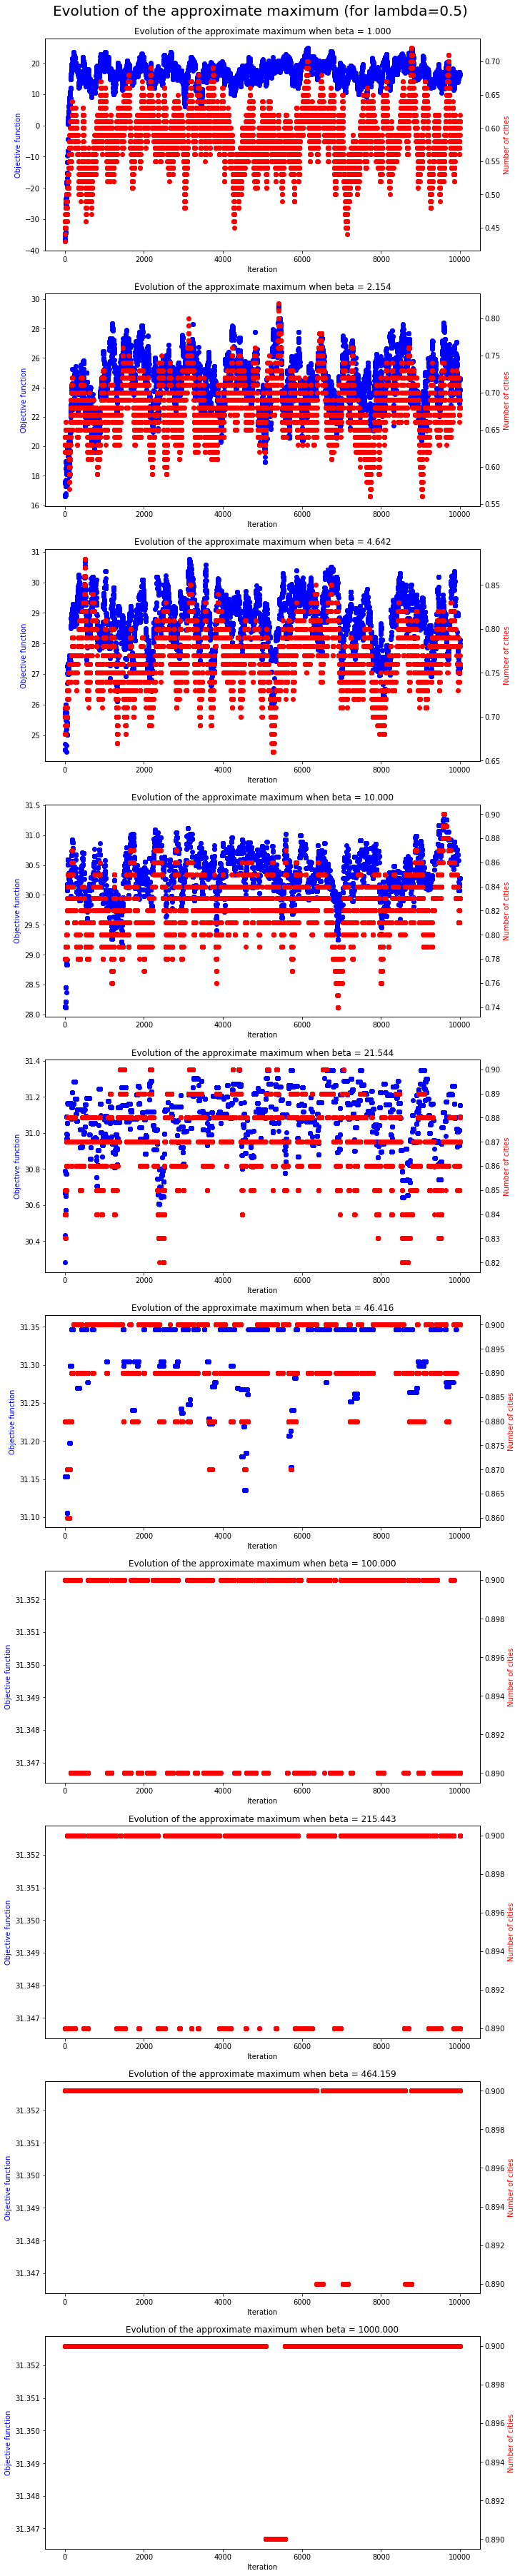

In [134]:
betas = np.logspace(0, 3, 10)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)